In [1]:
#Import relevant libraries
import pandas as pd
import numpy as np
from scipy.stats import iqr
from scipy.stats.mstats import mquantiles as quartiles

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Read glycan profile dataset and set index to sample IDs
df1 = pd.read_excel('Glycan_Data.xlsx')
df1.set_index('Sample',inplace=True)

#Show dataframe head
df1.head()

,SOCCS.ID,Plate,GP1,GP2,GP3,GP4,GP5,GP6,GP7,GP8,...,GP15,GP16,GP17,GP18,GP19,GP20,GP21,GP22,GP23,GP24
Sample,,,,,,,,,,,,,,,,,,,,,
CRC_1924,268500098,17,0.11,0.34,0.34,27.70,0.30,6.74,0.44,16.95,...,1.17,3.60,0.97,8.23,1.89,0.28,1.16,0.12,2.09,2.23
CRC_2411,270200098,3,0.76,0.94,0.37,17.82,0.46,4.07,1.37,18.38,...,1.82,3.34,1.31,8.45,1.78,0.63,1.56,0.15,1.94,1.82
CRC_2432,270700098,3,0.19,0.42,0.41,23.71,0.29,4.82,0.46,18.90,...,1.51,3.37,0.76,8.82,1.61,0.42,0.71,0.07,1.20,1.27
CRC_2460,271900098,3,0.15,0.36,0.32,17.95,0.24,5.08,0.36,16.90,...,2.04,3.76,0.94,13.53,1.91,0.35,0.93,0.14,2.17,2.65
CRC_2461,21200005,2,0.09,0.71,0.32,19.23,0.31,5.15,0.85,20.20,...,1.59,3.04,0.86,7.62,1.84,0.42,0.96,0.11,1.37,1.46


In [3]:
#Check dataframe index length
len(df1.index)

1957

In [4]:
#Read patient information dataset and set index to sample IDs
df2 = pd.read_excel('Patient_Details.xlsx')
df2.set_index('Sample',inplace=True)

#Show dataframe head
df2.head()

,MD,SOCCSID.x,Study.ID,Gender,Age at sample,Status,sample.date,Age at Cancer Diagnosis,BMI combined files,Tumour location,T.stage,N.stage,M.stage,IJCC Stage: All source files
Sample,,,,,,,,,,,,,,
CRC_1924,1924,268500098,COGS,M,51.153425,Cancer,1999-10-28,51.0,NaN,Rectum,T2,N0,M0,1.0
CRC_2411,2411,270200098,COGS,F,49.410959,Cancer,2001-07-11,49.0,NaN,Rectosigmoid,T3,N1,M0,3.0
CRC_2432,2432,270700098,COGS,M,46.312329,Cancer,2001-08-20,46.0,NaN,Transverse colon,T3,N1,M0,3.0
CRC_2460,2460,271900098,COGS,F,53.369863,Cancer,2001-10-25,53.0,NaN,Hepatic flexure,T4,N0,M0,2.0
CRC_2461,2461,21200005,COGS & SOCCS,M,46.136986,Cancer,2001-12-29,45.0,22.53,Rectum,T3,N0,M0,2.0


In [5]:
#Check dataframe index length
len(df2.index)

1959

In [6]:
#check for duplicate entries in dataframes
print('There are',df1.duplicated().sum(), 'duplicate entries in df1')
print('There are',df2.duplicated().sum(), 'duplicate entries in df2')

There are 0 duplicate entries in df1
There are 2 duplicate entries in df2


In [7]:
#Drop duplicate entries in df1
df1_cleaned=df1.drop_duplicates(keep = 'first')
#Drop duplicate entries in df2
df2_cleaned=df2.drop_duplicates(keep = 'first')

In [8]:
#Display remaining duplicate entries
print('There are',df1_cleaned.duplicated().sum(), 'remaining duplicate entries in df1')
print('There are',df2_cleaned.duplicated().sum(), 'remaining duplicate entries in df2')

There are 0 remaining duplicate entries in df1
There are 0 remaining duplicate entries in df2


In [9]:
#Display study ID counts
df2_cleaned['Study.ID'].value_counts()

SOCCS                 967
COGS & SOCCS          388
COGS&SOCCS CONTROL    260
COGS CONTROL          198
SOCCS CONTROL          81
COGS                   61
OTHER                   1
COGS 2                  1
Name: Study.ID, dtype: int64

In [10]:
#Change study ID number to a string
df1_cleaned['SOCCS.ID']=df1_cleaned['SOCCS.ID'].map(str)
df2_cleaned['SOCCSID.x']=df2_cleaned['SOCCSID.x'].map(str)

<ipython-input-10-b04477ec3376>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned['SOCCSID.x']=df2_cleaned['SOCCSID.x'].map(str)


In [11]:
#Homogeneous capitalisation for cancer marker
df2_cleaned['Status'] = df2_cleaned['Status'].str.capitalize()
df2_cleaned['Status'].value_counts()

<ipython-input-11-fecb084427a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned['Status'] = df2_cleaned['Status'].str.capitalize()


Cancer     1419
Control     538
Name: Status, dtype: int64

In [12]:
#Homogeneous capitalisation for cancer marker
print('The minimum age at sample entered is' , df2_cleaned['Age at sample'].min(), 
      'while the maximum age at sample entered is', df2_cleaned['Age at sample'].max())

The minimum age at sample entered is -66.62465753424658 while the maximum age at sample entered is 81.13424657534246


In [13]:
#Homogeneous capitalisation for cancer marker
df2_cleaned['Age at sample'] = df2_cleaned['Age at sample'].abs()
print('The new minimum age at sample entered is' , df2_cleaned['Age at sample'].min(), 
      'while the new maximum age at sample entered is', df2_cleaned['Age at sample'].max())

The new minimum age at sample entered is 20.747945205479454 while the new maximum age at sample entered is 81.13424657534246


<ipython-input-13-c90c5b39b69a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned['Age at sample'] = df2_cleaned['Age at sample'].abs()


In [14]:
#df2["SOCCSID.x length"]= df2["SOCCSID.x"].str.len()
#df2["SOCCSID.x length"].value_counts()
#df1["SOCCS.ID length"]= df1["SOCCS.ID"].str.len()
#df1["SOCCS.ID length"].value_counts()

In [15]:
#Capitalize tumour location
df2_cleaned["Tumour location "] = df2_cleaned["Tumour location "].str.capitalize()
df2_cleaned["Tumour location "].value_counts()

<ipython-input-15-325791917000>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned["Tumour location "] = df2_cleaned["Tumour location "].str.capitalize()


Rectum                             492
Sigmoid colon                      345
Caecum                             163
Rectosigmoid                       123
Transverse colon                    73
Ascending colon/hepatic flexure     52
Ascending colon                     49
Splenic flexure                     40
Descending colon                    25
Hepatic flexure                      9
Appendix                             5
Hepatic                              5
Left colon                           2
Colon (not rectum)                   2
Colon                                2
Distal ascending colon?              1
Mid-descending colon                 1
Descending colon (oistal)            1
Left sided                           1
Unknown                              1
Anus                                 1
Transverse colon and caecum          1
Liver mets - no op                   1
Terminal ileum                       1
Name: Tumour location , dtype: int64

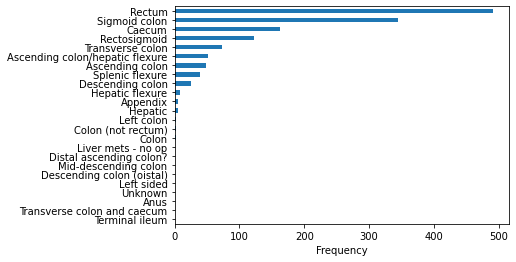

In [16]:
fig, axs = plt.subplots()
df2_cleaned["Tumour location "].value_counts().sort_values().plot(kind = 'barh', ax=axs)
axs.set_xlabel("Frequency") 
fig.savefig('Reporting/Images/Tumour location_whole_preprocessing.png') 

In [17]:
print('For the patient data:')
for i in df2.columns:
    print('There are', df2[i].isna().sum() , 'missing', i , 'entries')
    
print('For the glycan data:')
for i in df1.columns:
    print('There are', df1[i].isna().sum() , 'missing', i , 'entries')


For the patient data:
There are 0 missing MD entries
There are 0 missing SOCCSID.x entries
There are 0 missing Study.ID entries
There are 0 missing Gender entries
There are 0 missing Age at sample entries
There are 0 missing Status entries
There are 2 missing sample.date entries
There are 539 missing Age at Cancer Diagnosis entries
There are 240 missing BMI combined files entries
There are 561 missing Tumour location  entries
There are 538 missing T.stage entries
There are 538 missing N.stage entries
There are 538 missing M.stage entries
There are 538 missing IJCC Stage: All source files entries
For the glycan data:
There are 0 missing SOCCS.ID entries
There are 0 missing Plate entries
There are 0 missing GP1 entries
There are 0 missing GP2 entries
There are 0 missing GP3 entries
There are 0 missing GP4 entries
There are 0 missing GP5 entries
There are 0 missing GP6 entries
There are 0 missing GP7 entries
There are 0 missing GP8 entries
There are 0 missing GP9 entries
There are 0 missi

In [18]:
#Find sample without age at cancer diagnosis
missing_AgeatCancerDiagnosis=df2[(df2['Age at Cancer Diagnosis'].isna()==True)&(df2['Status']=='Cancer')]
print(missing_AgeatCancerDiagnosis.index[0])

CRC_6334


In [19]:
#Get groups and perform calculations for selected columns

Statusgroup=df2_cleaned.groupby('Status')
Statusgroup[['Age at sample']].describe()

Age at sample                                                        \
                count      mean        std        min        25%        50%   
Status                                                                        
Cancer         1419.0  59.70818  10.283021  21.369863  52.475342  60.334247   
Control         538.0  51.64682   5.880621  20.747945  48.228082  53.065753   

                               
               75%        max  
Status                         
Cancer   67.384932  81.134247  
Control  56.028767  73.893151

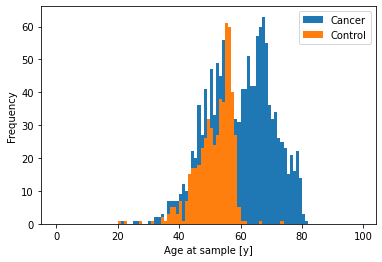

In [20]:
#Check age distribution
fig, axs = plt.subplots()
df2_cleaned.groupby('Status')['Age at sample'].plot(kind='hist', bins=range(0, 100), ax=axs, legend=True)
axs.set_xlabel("Age at sample [y]") 
fig.savefig('Reporting/Images/Age at sample_Status_preprocessing.png') 

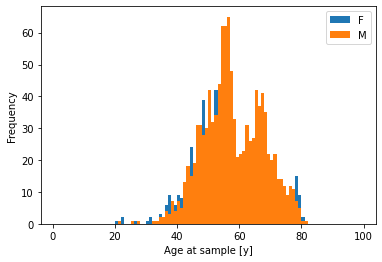

In [21]:
fig, axs = plt.subplots()
df2_cleaned.groupby('Gender')['Age at sample'].plot(kind='hist', bins=range(1, 100), ax=axs, legend=True)
axs.set_xlabel("Age at sample [y]") 
fig.savefig('Reporting/Images/Age at sample_Gender_preprocessing.png') 

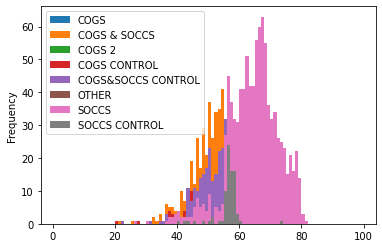

In [22]:
fig, axs = plt.subplots() 

df2_cleaned.groupby('Study.ID')['Age at sample'].plot(kind='hist', bins=range(1, 100), ax=axs, legend=True)
#df2_cleaned.groupby('Study.ID')['Age at sample'].get_group('SOCCS').plot(kind='hist', bins=range(1, 100), ax=axs, legend=True)
#axs.set_xlabel("Age at sample [y]") 
fig.savefig('Reporting/Images/Age at sample_Study ID_preprocessing.png') 

In [23]:
#Merge cleaned dataframes and check head
merged=df1_cleaned.join(df2_cleaned)
merged.head()

,SOCCS.ID,Plate,GP1,GP2,GP3,GP4,GP5,GP6,GP7,GP8,...,Age at sample,Status,sample.date,Age at Cancer Diagnosis,BMI combined files,Tumour location,T.stage,N.stage,M.stage,IJCC Stage: All source files
Sample,,,,,,,,,,,,,,,,,,,,,
CRC_1924,268500098,17,0.11,0.34,0.34,27.70,0.30,6.74,0.44,16.95,...,51.153425,Cancer,1999-10-28,51.0,NaN,Rectum,T2,N0,M0,1.0
CRC_2411,270200098,3,0.76,0.94,0.37,17.82,0.46,4.07,1.37,18.38,...,49.410959,Cancer,2001-07-11,49.0,NaN,Rectosigmoid,T3,N1,M0,3.0
CRC_2432,270700098,3,0.19,0.42,0.41,23.71,0.29,4.82,0.46,18.90,...,46.312329,Cancer,2001-08-20,46.0,NaN,Transverse colon,T3,N1,M0,3.0
CRC_2460,271900098,3,0.15,0.36,0.32,17.95,0.24,5.08,0.36,16.90,...,53.369863,Cancer,2001-10-25,53.0,NaN,Hepatic flexure,T4,N0,M0,2.0
CRC_2461,21200005,2,0.09,0.71,0.32,19.23,0.31,5.15,0.85,20.20,...,46.136986,Cancer,2001-12-29,45.0,22.53,Rectum,T3,N0,M0,2.0


In [24]:
#List columns for easier selection below
#list(merged.columns)

In [25]:
#Check data type of each column
merged.dtypes

SOCCS.ID                                object
Plate                                    int64
GP1                                    float64
GP2                                    float64
GP3                                    float64
GP4                                    float64
GP5                                    float64
GP6                                    float64
GP7                                    float64
GP8                                    float64
GP9                                    float64
GP10                                   float64
GP11                                   float64
GP12                                   float64
GP13                                   float64
GP14                                   float64
GP15                                   float64
GP16                                   float64
GP17                                   float64
GP18                                   float64
GP19                                   float64
GP20         

In [26]:
#Sanity check row numbers
print('The merged dataframe has',len(merged.index),'rows, while the cleaned glycan profile dataframe had',len(df1_cleaned.index),', and the cleaned patient dataframe had',len(merged.index))

The merged dataframe has 1957 rows, while the cleaned glycan profile dataframe had 1957 , and the cleaned patient dataframe had 1957


In [27]:
#Get groups
print(merged.isna().sum())
#Statusgroup2=merged.groupby(['Status','Gender'])
#print(Statusgroup2.groups)
#Statusgroup2[['GP1', 'GP2', 'GP3', 'BMI combined files']].agg([np.mean,np.std, np.median, iqr])

SOCCS.ID                          0
Plate                             0
GP1                               0
GP2                               0
GP3                               0
GP4                               0
GP5                               0
GP6                               0
GP7                               0
GP8                               0
GP9                               0
GP10                              0
GP11                              0
GP12                              0
GP13                              0
GP14                              0
GP15                              0
GP16                              0
GP17                              0
GP18                              0
GP19                              0
GP20                              0
GP21                              0
GP22                              0
GP23                              0
GP24                              0
MD                                0
SOCCSID.x                   

In [28]:
merged_BMI_describe=merged.groupby('Status')['BMI combined files'].describe()
merged_BMI_describe['original count']=merged['Status'].value_counts()
print(merged_BMI_describe)
#print(merged['Status'].value_counts())
print('There are', merged_BMI_describe['original count']['Cancer']-merged_BMI_describe['count']['Cancer'], 'missing cancer patient BMIs',
     'and', merged_BMI_describe['original count']['Control']-merged_BMI_describe['count']['Control'], 'missing control BMIs' )

          count       mean        std    min     25%     50%    75%     max  \
Status                                                                        
Cancer   1268.0  27.571956  18.283695  15.73  23.545  26.190  29.07  416.23   
Control   450.0  32.254556  35.530983  15.27  25.860  27.895  30.70  416.23   

         original count  
Status                   
Cancer             1419  
Control             538  
There are 151.0 missing cancer patient BMIs and 88.0 missing control BMIs


In [29]:
#Extract sub-databases for Cancer and Control
merged_cancer=merged[(merged['Status']=='Cancer')]
merged_control=merged[(merged['Status']=='Control')]

<AxesSubplot:>

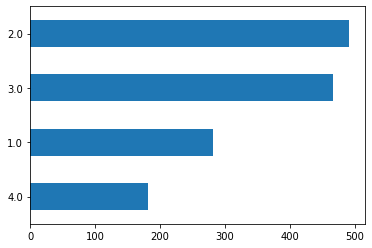

In [30]:
merged_cancer['IJCC Stage: All source files'].value_counts(sort=True, ascending=True).plot(kind = 'barh')

Study.ID
COGS                  AxesSubplot(0.125,0.125;0.775x0.755)
COGS & SOCCS          AxesSubplot(0.125,0.125;0.775x0.755)
COGS 2                AxesSubplot(0.125,0.125;0.775x0.755)
COGS&SOCCS CONTROL    AxesSubplot(0.125,0.125;0.775x0.755)
OTHER                 AxesSubplot(0.125,0.125;0.775x0.755)
SOCCS                 AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age at sample, dtype: object

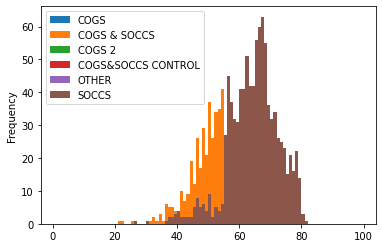

In [31]:
merged_cancer.groupby('Study.ID')['Age at sample'].plot(kind='hist', bins=range(1, 100), legend=True)

<ipython-input-32-d6712a77a1d9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged_cancer[(merged['Study.ID']=='COGS & SOCCS')]['Age at sample'].plot(kind='hist', bins=range(1, 100), legend=True)


<AxesSubplot:ylabel='Frequency'>

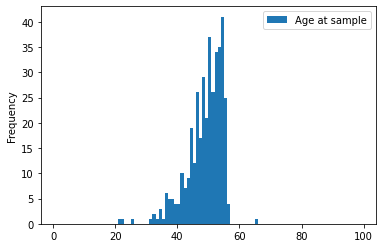

In [32]:
merged_cancer[(merged['Study.ID']=='COGS & SOCCS')]['Age at sample'].plot(kind='hist', bins=range(1, 100), legend=True)

Study.ID
COGS CONTROL          AxesSubplot(0.125,0.125;0.775x0.755)
COGS&SOCCS CONTROL    AxesSubplot(0.125,0.125;0.775x0.755)
SOCCS CONTROL         AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age at sample, dtype: object

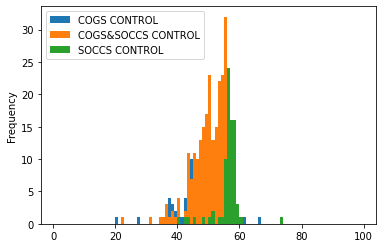

In [33]:
merged_control.groupby('Study.ID')['Age at sample'].plot(kind='hist', bins=range(1, 100), legend=True)

In [34]:
merged_cancer['Years since diagnosis']=merged_cancer['Age at sample']-merged_cancer['Age at Cancer Diagnosis']
print(merged_cancer['Years since diagnosis'])

Sample
CRC_1924    0.153425
CRC_2411    0.410959
CRC_2432    0.312329
CRC_2460    0.369863
CRC_2461    1.136986
              ...   
CRC_9964    0.753425
CRC_9965    1.361644
CRC_9966    0.745205
CRC_9984    1.334247
CRC_9985    1.035616
Name: Years since diagnosis, Length: 1419, dtype: float64


<ipython-input-34-f02593d37e56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_cancer['Years since diagnosis']=merged_cancer['Age at sample']-merged_cancer['Age at Cancer Diagnosis']


<AxesSubplot:ylabel='Frequency'>

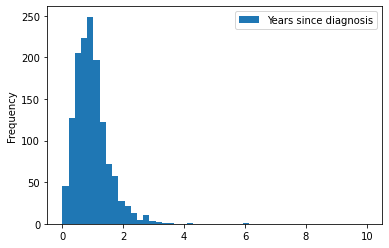

In [35]:
#Check age distribution
merged_cancer['Years since diagnosis'].plot(kind='hist', bins=np.linspace(0,10,50), legend=True)

In [36]:
#Select desired columns for cleaned dataset excel, and check head
glycans_list=["GP1","GP2","GP3","GP4","GP5","GP6","GP7","GP8","GP9","GP10","GP11","GP12",
            "GP13","GP14","GP15","GP16","GP17","GP18","GP19","GP20","GP21","GP22","GP23","GP24"]
other_inputs_list=["Age at sample","Gender"]
category_marker=["Status"]
postprocessing_categories_list=['Tumour location ','T.stage','N.stage','M.stage','IJCC Stage: All source files']

df3=merged[glycans_list+other_inputs_list+category_marker]
df3.head()

,GP1,GP2,GP3,GP4,GP5,GP6,GP7,GP8,GP9,GP10,...,GP18,GP19,GP20,GP21,GP22,GP23,GP24,Age at sample,Gender,Status
Sample,,,,,,,,,,,,,,,,,,,,,
CRC_1924,0.11,0.34,0.34,27.70,0.30,6.74,0.44,16.95,9.42,4.66,...,8.23,1.89,0.28,1.16,0.12,2.09,2.23,51.153425,M,Cancer
CRC_2411,0.76,0.94,0.37,17.82,0.46,4.07,1.37,18.38,11.75,4.77,...,8.45,1.78,0.63,1.56,0.15,1.94,1.82,49.410959,F,Cancer
CRC_2432,0.19,0.42,0.41,23.71,0.29,4.82,0.46,18.90,10.87,4.57,...,8.82,1.61,0.42,0.71,0.07,1.20,1.27,46.312329,M,Cancer
CRC_2460,0.15,0.36,0.32,17.95,0.24,5.08,0.36,16.90,7.54,5.75,...,13.53,1.91,0.35,0.93,0.14,2.17,2.65,53.369863,F,Cancer
CRC_2461,0.09,0.71,0.32,19.23,0.31,5.15,0.85,20.20,12.67,5.14,...,7.62,1.84,0.42,0.96,0.11,1.37,1.46,46.136986,M,Cancer


In [37]:
#Export final dataframe to Excel sheet in this folder and the SurvNet one
with pd.ExcelWriter('Cleaned_Dataframe.xlsx') as writer:
    df3.to_excel(writer, sheet_name='Combined', index = True)
    
with pd.ExcelWriter('SurvNet-glycans/Cleaned_Dataframe.xlsx') as writer:
    df3.to_excel(writer, sheet_name='Combined', index = True)